# Anlysis of solar panel data

In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
 #Import data set
 data=pd.read_csv('solar_panel.csv')

To gain initial insights, let's plot a histogram for each column of the data.

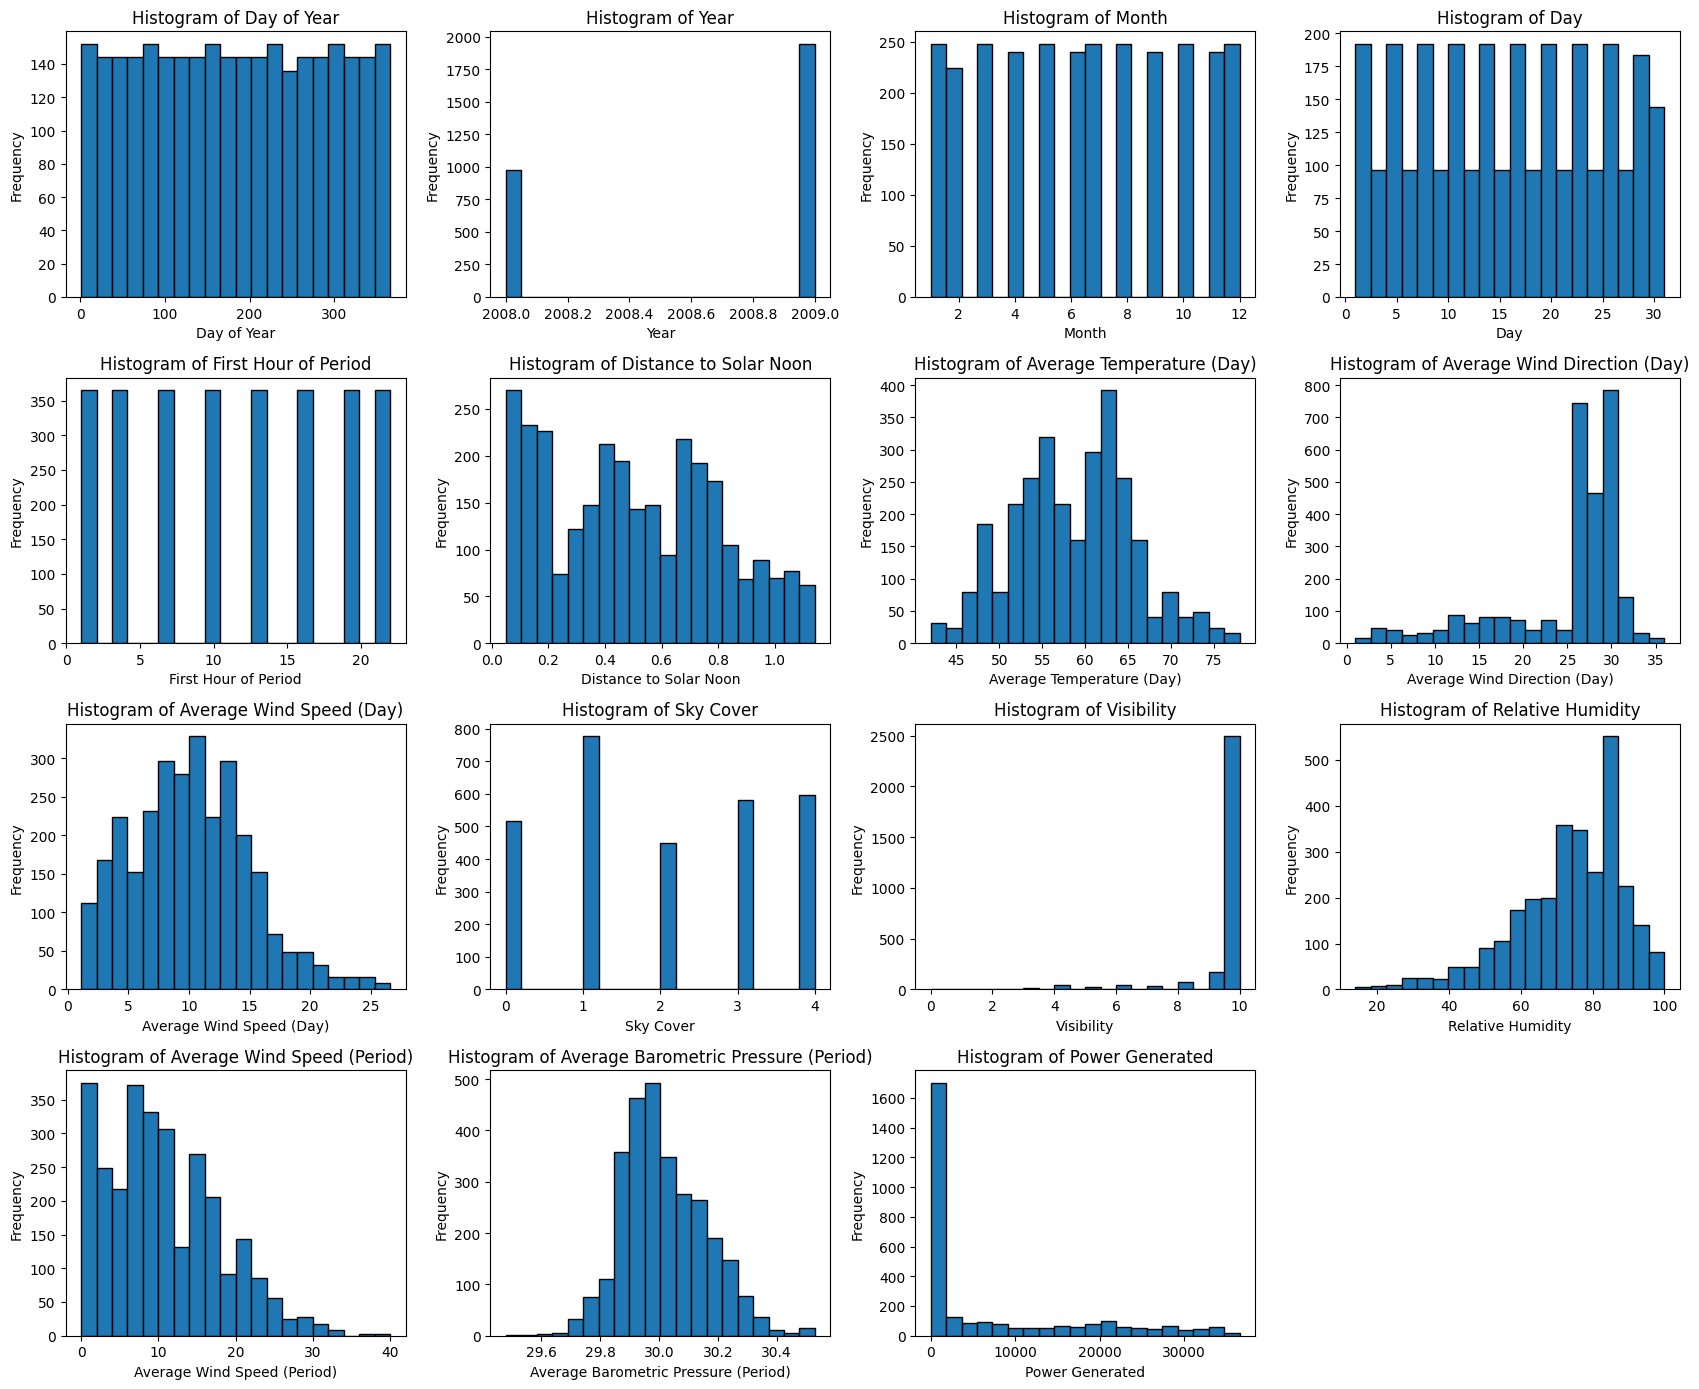

In [3]:
#plot all graphs of every column
plt.figure(figsize=(17, 14))

for plot, column in enumerate(data.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(4, 4, plot + 1)
    data[column].hist(bins=20, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.grid(False)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Use a visualization to show how the amount of generated power changes over the year. let's determine which
day is the maximum power generated

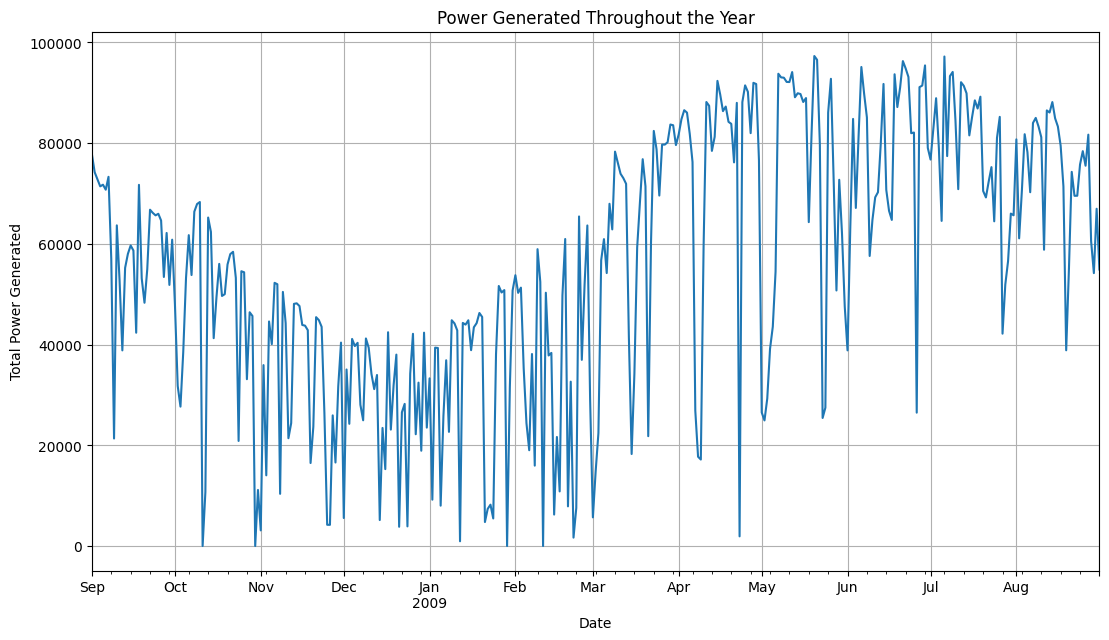


The maximum power was generated on: 2009-05-20


In [4]:
#Make new colum that handles dates
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])

# This will sum all the power generated each day
daily_power = data.groupby('Date')['Power Generated'].sum()
#plot the figure
plt.figure(figsize=(13, 7))
daily_power.plot(title='Power Generated Throughout the Year')
plt.xlabel('Date')
plt.ylabel('Total Power Generated')
plt.grid(True)
plt.show()

max_power_date = daily_power.idxmax()
max_power_date_formatted = max_power_date.strftime('%Y-%m-%d')


print(f"\nThe maximum power was generated on: {max_power_date_formatted}")



To understand more about the interaction between weather and generated power, let's cluster the data
into two groups based on the average sky cover per day for a suitable threshold. Is there a connection 
between sky cover and power generation? Does this connection change over the year?

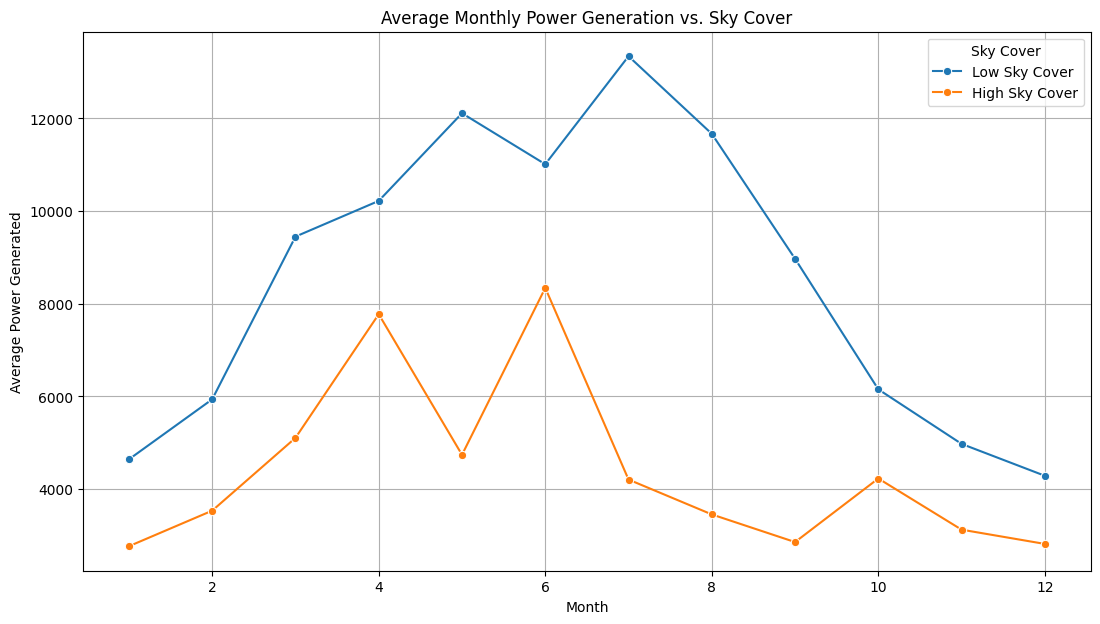

In [5]:
# Divide groups into below and above average sky cover
below_median = data[data['Sky Cover'] <= data['Sky Cover'].median()]
above_median = data[data['Sky Cover'] > data['Sky Cover'].median()]

# Calculate the average power generated for each group by grouping data according to month and sky cover level.
avg_below_median = below_median.groupby('Month')['Power Generated'].mean().reset_index()
avg_above_median = above_median.groupby('Month')['Power Generated'].mean().reset_index()

# Create plot
plt.figure(figsize=(13, 7))
sns.lineplot(data=avg_below_median, x='Month', y='Power Generated', label='Low Sky Cover', marker='o')
sns.lineplot(data=avg_above_median, x='Month', y='Power Generated', label='High Sky Cover', marker='o')

plt.title('Average Monthly Power Generation vs. Sky Cover')
plt.xlabel('Month')
plt.ylabel('Average Power Generated')
plt.legend(title='Sky Cover')
plt.grid(True)
plt.show()

In [6]:
print('It seems that if we have LESS sky cover we would have more power generation. And Vice versa.')
print('\nThere also seems to be a change accross differnt months of the year, it looks that it reaches its peak during the summer period of the year.')

It seems that if we have LESS sky cover we would have more power generation. And Vice versa.

There also seems to be a change accross differnt months of the year, it looks that it reaches its peak during the summer period of the year.
